**LINEAR REGRESSION**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Loading preprocessed SAR image data
data = pd.read_csv('/content/Soilmoisture gt data1.csv')

# Selecting the relevant columns including MPDI(31.1.24)
X = data[['Elevation (in m above MSL)', 'MPDI(31.1.24)', 'LULC']]
y = data['Moisture Reading']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Converting categorical columns to one-hot encoding
encoder = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(), ['LULC'])
    ],
    remainder='passthrough'
)
X_train_encoded = encoder.fit_transform(X_train)
X_test_encoded = encoder.transform(X_test)

# Linear regression model
model = LinearRegression()

# Dropping of rows with NaN values in y_train
nan_indices = y_train.index[y_train.isna()]
X_train_encoded = X_train_encoded[~y_train.isna()]
y_train = y_train.dropna()

# Training the model
model.fit(X_train_encoded, y_train)

# Dropping rows with NaN values in y_test
nan_indices = y_test.index[y_test.isna()]
X_test_encoded = X_test_encoded[~y_test.isna()]
y_test = y_test.dropna()

# Making predictions
y_pred = model.predict(X_test_encoded)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)
from scipy.stats import pearsonr

# Calculate the coefficient of correlation
correlation_coefficient, _ = pearsonr(y_pred, y_test)

print("Coefficient of correlation:", correlation_coefficient)
import numpy as np

# Calculate RMSE
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)



Mean Squared Error: 22.1471895107114
R-squared: 0.7518707617428618
Coefficient of correlation: 0.8775568812737631
Root Mean Squared Error: 4.706080057830657


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Loading preprocessed SAR image data
data = pd.read_csv('/content/Soilmoisture gt data1.csv')

# Selecting the relevant columns including MPDI(31.1.24)
X = data[['Elevation (in m above MSL)', 'RVI(31.1.24)', 'LULC']]
y = data['Moisture Reading']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Converting categorical columns to one-hot encoding
encoder = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(), ['LULC'])
    ],
    remainder='passthrough'
)
X_train_encoded = encoder.fit_transform(X_train)
X_test_encoded = encoder.transform(X_test)

# Linear regression model
model = LinearRegression()

# Dropping of rows with NaN values in y_train
nan_indices = y_train.index[y_train.isna()]
X_train_encoded = X_train_encoded[~y_train.isna()]
y_train = y_train.dropna()

# Training the model
model.fit(X_train_encoded, y_train)

# Dropping rows with NaN values in y_test
nan_indices = y_test.index[y_test.isna()]
X_test_encoded = X_test_encoded[~y_test.isna()]
y_test = y_test.dropna()

# Making predictions
y_pred = model.predict(X_test_encoded)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

import numpy as np

# Calculate the coefficient of correlation
correlation_matrix = np.corrcoef(y_pred, y_test)

# The coefficient of correlation is the element at index (0, 1) or (1, 0) in the correlation matrix
correlation_coefficient = correlation_matrix[0, 1]

print("Coefficient of correlation:", correlation_coefficient)

Mean Squared Error: 29.374372550080036
R-squared: 0.6243231834945362
Coefficient of correlation: 0.8163287942981879


In [ ]:
#VH polarisation(LULC,Elevation)
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Load your preprocessed SAR image data
data = pd.read_csv('/content/Soilmoisture gt data1.csv')

# Select relevant columns including backscatter coefficients for 31.01.2024
X = data[['Elevation (in m above MSL)', 'Sigma0_VH_db (31.01.2024)', 'LULC']]
y = data['Moisture Reading']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Handle missing values
imputer = SimpleImputer(strategy='mean')
X_train[['Sigma0_VH_db (31.01.2024)']] = imputer.fit_transform(X_train[['Sigma0_VH_db (31.01.2024)']])
X_test[['Sigma0_VH_db (31.01.2024)']] = imputer.transform(X_test[['Sigma0_VH_db (31.01.2024)']])

# Convert categorical columns to one-hot encoding
encoder = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(), ['LULC'])
    ],
    remainder='passthrough'
)
X_train_encoded = encoder.fit_transform(X_train)
X_test_encoded = encoder.transform(X_test)

# Create a linear regression model
model = LinearRegression()

# Drop rows with NaN values in y_train
nan_indices = y_train.index[y_train.isna()]
X_train_encoded = X_train_encoded[~y_train.isna()]
y_train = y_train.dropna()

# Train the model
model.fit(X_train_encoded, y_train)

# Drop rows with NaN values in y_test
nan_indices = y_test.index[y_test.isna()]
X_test_encoded = X_test_encoded[~y_test.isna()]
y_test = y_test.dropna()

# Make predictions
y_pred = model.predict(X_test_encoded)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)
from scipy.stats import pearsonr

# Calculate the coefficient of correlation
correlation_coefficient, _ = pearsonr(y_pred, y_test)

print("Coefficient of correlation:", correlation_coefficient)



Mean Squared Error: 31.312366193628645
R-squared: 0.5995376572275527
Coefficient of correlation: 0.8023793921960772


In [ ]:
#VV polarisation
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Load your preprocessed SAR image data
data = pd.read_csv('/content/Soilmoisture gt data1.csv')

# Select relevant columns including backscatter coefficients for 31.01.2024
X = data[['Elevation (in m above MSL)', 'Sigma0_VV_db (31.01.2024)','LULC']]
y = data['Moisture Reading']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Handle missing values
imputer = SimpleImputer(strategy='mean')
X_train[['Sigma0_VV_db (31.01.2024)']] = imputer.fit_transform(X_train[['Sigma0_VV_db (31.01.2024)']])
X_test[['Sigma0_VV_db (31.01.2024)']] = imputer.transform(X_test[['Sigma0_VV_db (31.01.2024)']])

# Convert categorical columns to one-hot encoding
encoder = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(), ['LULC'])
    ],
    remainder='passthrough'
)
X_train_encoded = encoder.fit_transform(X_train)
X_test_encoded = encoder.transform(X_test)

# Create a linear regression model
model = LinearRegression()

# Drop rows with NaN values in y_train
nan_indices = y_train.index[y_train.isna()]
X_train_encoded = X_train_encoded[~y_train.isna()]
y_train = y_train.dropna()

# Train the model
model.fit(X_train_encoded, y_train)

# Drop rows with NaN values in y_test
nan_indices = y_test.index[y_test.isna()]
X_test_encoded = X_test_encoded[~y_test.isna()]
y_test = y_test.dropna()

# Make predictions
y_pred = model.predict(X_test_encoded)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

import numpy as np

# Calculate the coefficient of correlation
correlation_matrix = np.corrcoef(y_pred, y_test)

# The coefficient of correlation is the element at index (0, 1) or (1, 0) in the correlation matrix
correlation_coefficient = correlation_matrix[0, 1]

print("Coefficient of correlation:", correlation_coefficient)

Mean Squared Error: 29.527977749766414
R-squared: 0.6223586849399378
Coefficient of correlation: 0.8129329694767687


**RANDOM FOREST**

Mean Squared Error: 3.998979509236743
R-squared: 0.950217719119105
Coefficient of correlation: 0.9764975792366956
Depth 1: Accuracy Score = 0.3838782544095406
Depth 2: Accuracy Score = 0.6091757435061659
Depth 3: Accuracy Score = 0.7264785603395316
Depth 4: Accuracy Score = 0.7950679677320499
Depth 5: Accuracy Score = 0.8547584159745119
Depth 6: Accuracy Score = 0.9044573618542753
Depth 7: Accuracy Score = 0.9322754624987774
Depth 8: Accuracy Score = 0.943224840025789
Depth 9: Accuracy Score = 0.948724791866867
Depth 10: Accuracy Score = 0.9500398856298816


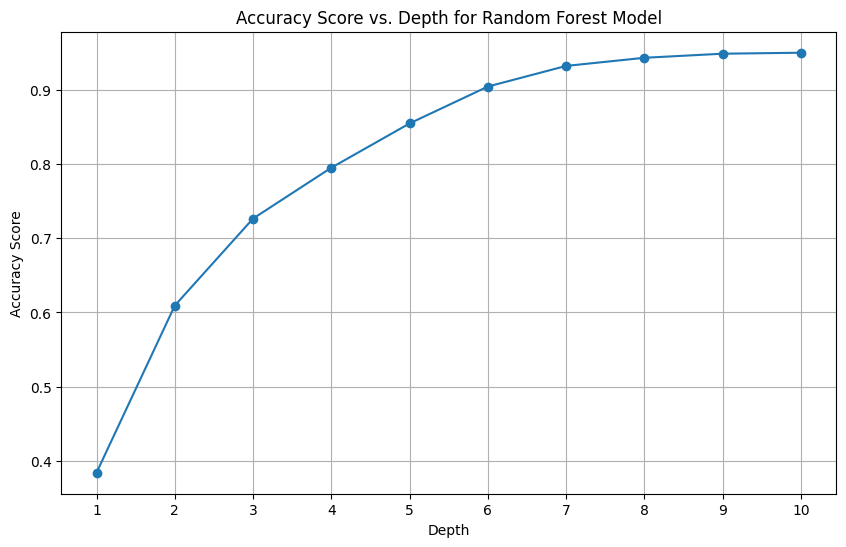

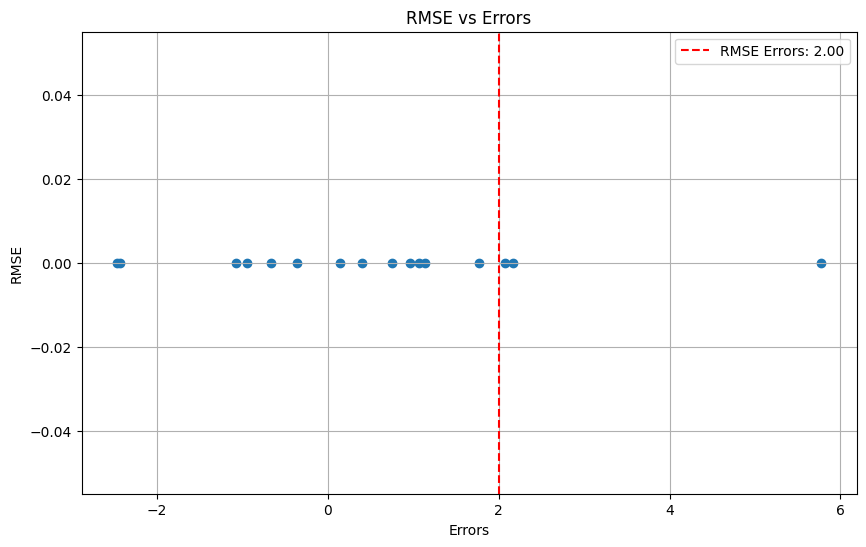

In [ ]:
#VV
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Load your preprocessed SAR image data
data = pd.read_csv('/content/Soilmoisture gt data.csv')

# Select relevant columns excluding Sigma0_VH_db (31.01.2024)
X = data[['Elevation (in m above MSL)', 'Sigma0_VV_db (31.01.2024)', 'LULC']]
y = data['Moisture Reading']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Handle missing values
imputer = SimpleImputer(strategy='mean')
X_train[['Sigma0_VV_db (31.01.2024)']] = imputer.fit_transform(X_train[['Sigma0_VV_db (31.01.2024)']])
X_test[['Sigma0_VV_db (31.01.2024)']] = imputer.transform(X_test[['Sigma0_VV_db (31.01.2024)']])

# Convert categorical columns to one-hot encoding
encoder = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(), ['LULC'])
    ],
    remainder='passthrough'
)
X_train_encoded = encoder.fit_transform(X_train)
X_test_encoded = encoder.transform(X_test)

# Create a Random Forest regression model
rf_model = RandomForestRegressor(random_state=42)

# Drop rows with NaN values in y_train
nan_indices = y_train.index[y_train.isna()]
X_train_encoded = X_train_encoded[~y_train.isna()]
y_train = y_train.dropna()

# Train the model
rf_model.fit(X_train_encoded, y_train)

# Drop rows with NaN values in y_test
nan_indices = y_test.index[y_test.isna()]
X_test_encoded = X_test_encoded[~y_test.isna()]
y_test = y_test.dropna()

# Make predictions
y_pred = rf_model.predict(X_test_encoded)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

import numpy as np

# Calculate the coefficient of correlation
correlation_matrix = np.corrcoef(y_pred, y_test)

# The coefficient of correlation is the element at index (0, 1) or (1, 0) in the correlation matrix
correlation_coefficient = correlation_matrix[0, 1]

print("Coefficient of correlation:", correlation_coefficient)

from sklearn.ensemble import RandomForestRegressor

# Initialize lists to store the depth and accuracy score
depths = []
accuracy_scores = []

# Try different depths for the Random Forest model
for depth in range(1, 11):
    # Create a Random Forest regression model with the current depth
    rf_model = RandomForestRegressor(max_depth=depth, random_state=42)

    # Train the model
    rf_model.fit(X_train_encoded, y_train)

    # Make predictions
    y_pred = rf_model.predict(X_test_encoded)

    # Calculate the R-squared score
    r2 = r2_score(y_test, y_pred)

    # Append the depth and accuracy score to the lists
    depths.append(depth)
    accuracy_scores.append(r2)

# Print the depth and accuracy score
for d, acc in zip(depths, accuracy_scores):
    print(f"Depth {d}: Accuracy Score = {acc}")

import matplotlib.pyplot as plt

# Plot the depth vs. accuracy scores
plt.figure(figsize=(10, 6))
plt.plot(depths, accuracy_scores, marker='o')
plt.xlabel('Depth')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Score vs. Depth for Random Forest Model')
plt.grid(True)
plt.xticks(range(1, 11))
plt.show()
# Calculate the error for each prediction
errors = y_test - y_pred

# Calculate the RMSE for the errors
rmse_errors = np.sqrt(mean_squared_error(np.zeros_like(errors), errors))

# Plot the RMSE against the errors
plt.figure(figsize=(10, 6))
plt.scatter(errors, np.zeros_like(errors))
plt.axvline(x=rmse_errors, color='r', linestyle='--', label=f'RMSE Errors: {rmse_errors:.2f}')
plt.xlabel('Errors')
plt.ylabel('RMSE')
plt.title('RMSE vs Errors')
plt.legend()
plt.grid(True)
plt.show()




In [ ]:
#VH
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Load your preprocessed SAR image data
data = pd.read_csv('/content/Soilmoisture gt data1.csv')

# Select relevant columns excluding Sigma0_VV_db (31.01.2024)
X = data[['Elevation (in m above MSL)', 'Sigma0_VH_db (31.01.2024)', 'LULC']]
y = data['Moisture Reading']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Handle missing values
imputer = SimpleImputer(strategy='mean')
X_train[['Sigma0_VH_db (31.01.2024)']] = imputer.fit_transform(X_train[['Sigma0_VH_db (31.01.2024)']])
X_test[['Sigma0_VH_db (31.01.2024)']] = imputer.transform(X_test[['Sigma0_VH_db (31.01.2024)']])

# Convert categorical columns to one-hot encoding
encoder = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(), ['LULC'])
    ],
    remainder='passthrough'
)
X_train_encoded = encoder.fit_transform(X_train)
X_test_encoded = encoder.transform(X_test)

# Create a Random Forest regression model
rf_model = RandomForestRegressor(random_state=42)

# Drop rows with NaN values in y_train
nan_indices = y_train.index[y_train.isna()]
X_train_encoded = X_train_encoded[~y_train.isna()]
y_train = y_train.dropna()

# Train the model
rf_model.fit(X_train_encoded, y_train)

# Drop rows with NaN values in y_test
nan_indices = y_test.index[y_test.isna()]
X_test_encoded = X_test_encoded[~y_test.isna()]
y_test = y_test.dropna()

# Make predictions
y_pred = rf_model.predict(X_test_encoded)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)
import numpy as np

# Calculate the coefficient of correlation
correlation_matrix = np.corrcoef(y_pred, y_test)

# The coefficient of correlation is the element at index (0, 1) or (1, 0) in the correlation matrix
correlation_coefficient = correlation_matrix[0, 1]

print("Coefficient of correlation:", correlation_coefficient)




Mean Squared Error: 5.614165551296528
R-squared: 0.92819891427298
Coefficient of correlation: 0.9639396724895283


In [ ]:
#MPDI
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Load your preprocessed SAR image data
data = pd.read_csv('/content/Soilmoisture gt data1.csv')

# Select relevant columns excluding Sigma0_VH_db (31.01.2024)
X = data[['Elevation (in m above MSL)', 'LULC', 'MPDI(31.1.24)']]
y = data['Moisture Reading']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Handle missing values
imputer = SimpleImputer(strategy='mean')
X_train[['MPDI(31.1.24)']] = imputer.fit_transform(X_train[['MPDI(31.1.24)']])
X_test[['MPDI(31.1.24)']] = imputer.transform(X_test[['MPDI(31.1.24)']])

# Convert categorical columns to one-hot encoding
encoder = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(), ['LULC'])
    ],
    remainder='passthrough'
)
X_train_encoded = encoder.fit_transform(X_train)
X_test_encoded = encoder.transform(X_test)

# Create a Random Forest regression model
rf_model = RandomForestRegressor(random_state=42)

# Drop rows with NaN values in y_train
nan_indices = y_train.index[y_train.isna()]
X_train_encoded = X_train_encoded[~y_train.isna()]
y_train = y_train.dropna()

# Train the model
rf_model.fit(X_train_encoded, y_train)

# Drop rows with NaN values in y_test
nan_indices = y_test.index[y_test.isna()]
X_test_encoded = X_test_encoded[~y_test.isna()]
y_test = y_test.dropna()

# Make predictions
y_pred = rf_model.predict(X_test_encoded)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

from scipy.stats import pearsonr

# Calculate the coefficient of correlation
correlation_coefficient, _ = pearsonr(y_pred, y_test)

print("Coefficient of correlation:", correlation_coefficient)

# Calculate RMSE
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)


Mean Squared Error: 20.25225386288417
R-squared: 0.7731009471175913
Coefficient of correlation: 0.8877603414497682
Root Mean Squared Error: 4.500250422241431


In [ ]:
#RVI
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Load your preprocessed SAR image data
data = pd.read_csv('/content/Soilmoisture gt data1.csv')

# Select relevant columns excluding Sigma0_VH_db (31.01.2024) and including RVI(31.1.24)
X = data[['Elevation (in m above MSL)', 'RVI(31.1.24)', 'LULC']]
y = data['Moisture Reading']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Handle missing values
imputer = SimpleImputer(strategy='mean')
X_train[['RVI(31.1.24)']] = imputer.fit_transform(X_train[['RVI(31.1.24)']])
X_test[['RVI(31.1.24)']] = imputer.transform(X_test[['RVI(31.1.24)']])

# Convert categorical columns to one-hot encoding
encoder = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(), ['LULC'])
    ],
    remainder='passthrough'
)
X_train_encoded = encoder.fit_transform(X_train)
X_test_encoded = encoder.transform(X_test)

# Create a Random Forest regression model
rf_model = RandomForestRegressor(random_state=42)

# Drop rows with NaN values in y_train
nan_indices = y_train.index[y_train.isna()]
X_train_encoded = X_train_encoded[~y_train.isna()]
y_train = y_train.dropna()

# Train the model
rf_model.fit(X_train_encoded, y_train)

# Drop rows with NaN values in y_test
nan_indices = y_test.index[y_test.isna()]
X_test_encoded = X_test_encoded[~y_test.isna()]
y_test = y_test.dropna()

# Make predictions
y_pred = rf_model.predict(X_test_encoded)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

from scipy.stats import pearsonr

# Calculate the coefficient of correlation
correlation_coefficient, _ = pearsonr(y_pred, y_test)

print("Coefficient of correlation:", correlation_coefficient)


Mean Squared Error: 5.733755178409388
R-squared: 0.9266694501006222
Coefficient of correlation: 0.9705982816904876


**DECISION TREE**

Mean Squared Error: 5.598493923611116
R-squared: 0.9303057701667526
Coefficient of correlation: 0.970417969267463
Depth 1: Accuracy Score = -0.004671881351198582
Depth 2: Accuracy Score = 0.1559789526271407
Depth 3: Accuracy Score = 0.3606816959214613
Depth 4: Accuracy Score = 0.4642972493679999
Depth 5: Accuracy Score = 0.5849005683897313
Depth 6: Accuracy Score = 0.6121659650073132
Depth 7: Accuracy Score = 0.70857768617596
Depth 8: Accuracy Score = 0.7811489444161863
Depth 9: Accuracy Score = 0.7815450917306018
Depth 10: Accuracy Score = 0.7817306854632443


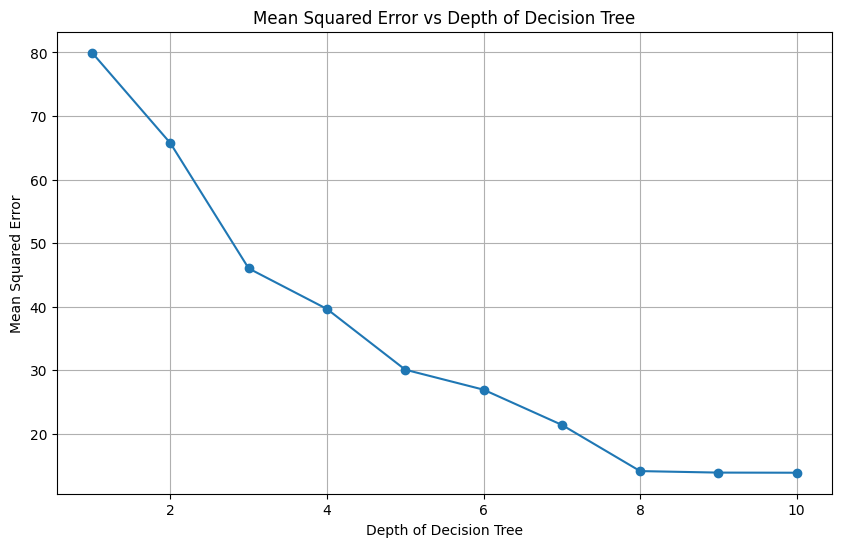

ValueError: Input y contains NaN.

In [ ]:
#VV
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Load your preprocessed SAR image data
data = pd.read_csv('/content/Soilmoisture gt data.csv')

# Select relevant columns excluding Sigma0_VH_db (31.01.2024)
X = data[['Elevation (in m above MSL)', 'Sigma0_VV_db (31.01.2024)', 'LULC']]
y = data['Moisture Reading']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Handle missing values
imputer = SimpleImputer(strategy='mean')
X_train[['Sigma0_VV_db (31.01.2024)']] = imputer.fit_transform(X_train[['Sigma0_VV_db (31.01.2024)']])
X_test[['Sigma0_VV_db (31.01.2024)']] = imputer.transform(X_test[['Sigma0_VV_db (31.01.2024)']])

# Convert categorical columns to one-hot encoding
encoder = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(), ['LULC'])
    ],
    remainder='passthrough'
)
X_train_encoded = encoder.fit_transform(X_train)
X_test_encoded = encoder.transform(X_test)

# Create a Decision Tree regression model
dt_model = DecisionTreeRegressor(random_state=42)

# Drop rows with NaN values in y_train
nan_indices = y_train.index[y_train.isna()]
X_train_encoded = X_train_encoded[~y_train.isna()]
y_train = y_train.dropna()

# Train the model
dt_model.fit(X_train_encoded, y_train)

# Drop rows with NaN values in y_test
nan_indices = y_test.index[y_test.isna()]
X_test_encoded = X_test_encoded[~y_test.isna()]
y_test = y_test.dropna()

# Make predictions
y_pred = dt_model.predict(X_test_encoded)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

from scipy.stats import pearsonr

# Calculate the coefficient of correlation
correlation_coefficient, _ = pearsonr(y_pred, y_test)

print("Coefficient of correlation:", correlation_coefficient)

from sklearn.model_selection import cross_val_score
import numpy as np

# Define the range of depths to test
depths = range(1, 11)  # Example: Test depths from 1 to 10

# Initialize an empty list to store the accuracy scores
accuracy_scores = []

for depth in depths:
    # Create a Decision Tree regression model with the current depth
    dt_model = DecisionTreeRegressor(max_depth=depth, random_state=42)

    # Use cross-validation to calculate the accuracy score
    scores = cross_val_score(dt_model, X_train_encoded, y_train, cv=5, scoring='r2')

    # Calculate the mean accuracy score
    mean_accuracy = np.mean(scores)

    # Append the mean accuracy score to the list
    accuracy_scores.append(mean_accuracy)

# Print the accuracy scores for each depth
for depth, accuracy_score in zip(depths, accuracy_scores):
    print(f"Depth {depth}: Accuracy Score = {accuracy_score}")

import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

# Define the range of depths to test
depths = range(1, 11)  # Example: Test depths from 1 to 10

# Initialize an empty list to store the mean squared errors
mse_scores = []

for depth in depths:
    # Create a Decision Tree regression model with the current depth
    dt_model = DecisionTreeRegressor(max_depth=depth, random_state=42)

    # Use cross-validation to calculate the mean squared error
    scores = cross_val_score(dt_model, X_train_encoded, y_train, cv=5, scoring='neg_mean_squared_error')

    # Calculate the mean squared error
    mean_mse = np.mean(-scores)

    # Append the mean squared error to the list
    mse_scores.append(mean_mse)

# Plot the depth versus the mean squared error
plt.figure(figsize=(10, 6))
plt.plot(depths, mse_scores, marker='o')
plt.xlabel('Depth of Decision Tree')
plt.ylabel('Mean Squared Error')
plt.title('Mean Squared Error vs Depth of Decision Tree')
plt.grid(True)
plt.show()


import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score
from scipy.stats import pearsonr

# Load your preprocessed SAR image data
data = pd.read_csv('/content/Soilmoisture gt data.csv')

# Select relevant columns excluding Sigma0_VH_db (31.01.2024)
X = data[['Elevation (in m above MSL)', 'Sigma0_VV_db (31.01.2024)', 'LULC']]
y = data['Moisture Reading']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Handle missing values
imputer = SimpleImputer(strategy='mean')
X_train[['Sigma0_VV_db (31.01.2024)']] = imputer.fit_transform(X_train[['Sigma0_VV_db (31.01.2024)']])
X_test[['Sigma0_VV_db (31.01.2024)']] = imputer.transform(X_test[['Sigma0_VV_db (31.01.2024)']])

# Convert categorical columns to one-hot encoding
encoder = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(), ['LULC'])
    ],
    remainder='passthrough'
)
X_train_encoded = encoder.fit_transform(X_train)
X_test_encoded = encoder.transform(X_test)

# Create a Decision Tree regression model
dt_model = DecisionTreeRegressor(random_state=42)

# Train the model
dt_model.fit(X_train_encoded, y_train)

# Make predictions
y_pred = dt_model.predict(X_test_encoded)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
correlation_coefficient, _ = pearsonr(y_pred, y_test)

print("Mean Squared Error:", mse)
print("R-squared:", r2)
print("Coefficient of correlation:", correlation_coefficient)

# Define the range of depths to test
depths = range(1, 11)  # Example: Test depths from 1 to 10

# Initialize an empty list to store the accuracy scores
accuracy_scores = []

for depth in depths:
    # Create a Decision Tree regression model with the current depth
    dt_model = DecisionTreeRegressor(max_depth=depth, random_state=42)

    # Use cross-validation to calculate the accuracy score
    scores = cross_val_score(dt_model, X_train_encoded, y_train, cv=5, scoring='r2')



In [ ]:
#VH
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Load your preprocessed SAR image data
data = pd.read_csv('/content/Soilmoisture gt data1.csv')

# Select relevant columns excluding Sigma0_VV_db (31.01.2024)
X = data[['Elevation (in m above MSL)', 'Sigma0_VH_db (31.01.2024)', 'LULC']]
y = data['Moisture Reading']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Handle missing values
imputer = SimpleImputer(strategy='mean')
X_train[['Sigma0_VH_db (31.01.2024)']] = imputer.fit_transform(X_train[['Sigma0_VH_db (31.01.2024)']])
X_test[['Sigma0_VH_db (31.01.2024)']] = imputer.transform(X_test[['Sigma0_VH_db (31.01.2024)']])

# Convert categorical columns to one-hot encoding
encoder = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(), ['LULC'])
    ],
    remainder='passthrough'
)
X_train_encoded = encoder.fit_transform(X_train)
X_test_encoded = encoder.transform(X_test)

# Create a RandomForestRegressor model
rf_model = RandomForestRegressor(random_state=42)

# Drop rows with NaN values in y_train
nan_indices = y_train.index[y_train.isna()]
X_train_encoded = X_train_encoded[~y_train.isna()]
y_train = y_train.dropna()

# Perform Grid Search to find the best hyperparameters
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30]
}
grid_search = GridSearchCV(rf_model, param_grid, cv=5, n_jobs=-1, error_score='raise')
grid_search.fit(X_train_encoded, y_train)

# Make predictions
y_pred = grid_search.best_estimator_.predict(X_test_encoded)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)
from scipy.stats import pearsonr

# Calculate the coefficient of correlation
correlation_coefficient, _ = pearsonr(y_pred, y_test)

print("Coefficient of correlation:", correlation_coefficient)

ValueError: Input contains NaN.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Load your preprocessed SAR image data
data = pd.read_csv('/content/Soilmoisture gt data1.csv')

# Select relevant columns excluding Sigma0_VH_db (31.01.2024)
X = data[['Elevation (in m above MSL)', 'RVI(31.1.24)', 'LULC']]
y = data['Moisture Reading']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert categorical columns to one-hot encoding
encoder = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(), ['LULC'])
    ],
    remainder='passthrough'
)
X_train_encoded = encoder.fit_transform(X_train)
X_test_encoded = encoder.transform(X_test)

# Create a Decision Tree regression model
dt_model = DecisionTreeRegressor(random_state=42)

# Drop rows with NaN values in y_train
nan_indices = y_train.index[y_train.isna()]
X_train_encoded = X_train_encoded[~y_train.isna()]
y_train = y_train.dropna()

# Train the model
dt_model.fit(X_train_encoded, y_train)

# Drop rows with NaN values in y_test
nan_indices = y_test.index[y_test.isna()]
X_test_encoded = X_test_encoded[~y_test.isna()]
y_test = y_test.dropna()

# Make predictions
y_pred = dt_model.predict(X_test_encoded)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

from scipy.stats import pearsonr

# Calculate the coefficient of correlation
correlation_coefficient, _ = pearsonr(y_pred, y_test)

print("Coefficient of correlation:", correlation_coefficient)


Mean Squared Error: 5.622258986928109
R-squared: 0.9280954051298491
Coefficient of correlation: 0.9708670441511884


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from scipy.stats import pearsonr

# Load your preprocessed SAR image data
data = pd.read_csv('/content/Soilmoisture gt data1.csv')

# Select relevant columns excluding Sigma0_VH_db (31.01.2024)
X = data[['Elevation (in m above MSL)', 'MPDI(31.1.24)', 'LULC']]
y = data['Moisture Reading']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert categorical columns to one-hot encoding
encoder = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(), ['LULC'])
    ],
    remainder='passthrough'
)
X_train_encoded = encoder.fit_transform(X_train)
X_test_encoded = encoder.transform(X_test)

# Create a Decision Tree regression model
dt_model = DecisionTreeRegressor(random_state=42)

# Drop rows with NaN values in y_train
nan_indices = y_train.index[y_train.isna()]
X_train_encoded = X_train_encoded[~y_train.isna()]
y_train = y_train.dropna()

# Train the model
dt_model.fit(X_train_encoded, y_train)

# Drop rows with NaN values in y_test
nan_indices = y_test.index[y_test.isna()]
X_test_encoded = X_test_encoded[~y_test.isna()]
y_test = y_test.dropna()

# Make predictions
y_pred = dt_model.predict(X_test_encoded)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Calculate the coefficient of correlation
correlation_coefficient, _ = pearsonr(y_pred, y_test)

print("Coefficient of correlation:", correlation_coefficient)

# Create a DataFrame with predicted and actual values
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Save the results to a CSV file
results_df.to_csv('predicted_moisture_reading.csv', index=False)

import numpy as np

# Calculate RMSE
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)




Mean Squared Error: 9.617532679738565
R-squared: 0.8922485827566294
Coefficient of correlation: 0.9585046560627023
Root Mean Squared Error: 3.101214710357631


**GRADIENT BOOST**

In [ ]:
#VH
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Load your preprocessed SAR image data
data = pd.read_csv('/content/Soilmoisture gt data1.csv')

# Select relevant columns excluding Sigma0_VV_db (31.01.2024)
X = data[['Elevation (in m above MSL)', 'Sigma0_VH_db (31.01.2024)', 'LULC']]
y = data['Moisture Reading']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Handle missing values
imputer = SimpleImputer(strategy='mean')
X_train[['Sigma0_VH_db (31.01.2024)']] = imputer.fit_transform(X_train[['Sigma0_VH_db (31.01.2024)']])
X_test[['Sigma0_VH_db (31.01.2024)']] = imputer.transform(X_test[['Sigma0_VH_db (31.01.2024)']])

# Convert categorical columns to one-hot encoding
encoder = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(), ['LULC'])
    ],
    remainder='passthrough'
)
X_train_encoded = encoder.fit_transform(X_train)
X_test_encoded = encoder.transform(X_test)

# Create a Gradient Boosting regression model
gb_model = GradientBoostingRegressor(random_state=42)

# Drop rows with NaN values in y_train
nan_indices = y_train.index[y_train.isna()]
X_train_encoded = X_train_encoded[~y_train.isna()]
y_train = y_train.dropna()

# Train the model
gb_model.fit(X_train_encoded, y_train)

# Drop rows with NaN values in y_test
nan_indices = y_test.index[y_test.isna()]
X_test_encoded = X_test_encoded[~y_test.isna()]
y_test = y_test.dropna()

# Make predictions
y_pred = gb_model.predict(X_test_encoded)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

from scipy.stats import pearsonr

# Calculate the coefficient of correlation
correlation_coefficient, _ = pearsonr(y_pred, y_test)

print("Coefficient of correlation:", correlation_coefficient)


Mean Squared Error: 6.2109764494461475
R-squared: 0.9205661378488923
Coefficient of correlation: 0.9624217991462495


Mean Squared Error: 5.723634486713632
R-squared: 0.9287479270601366
Depth 1: R-squared = 0.7459620369968378
Depth 2: R-squared = 0.8909064242567314
Depth 3: R-squared = 0.9287479270601366
Depth 4: R-squared = 0.930131983964811
Depth 5: R-squared = 0.9303006860581411
Depth 6: R-squared = 0.9303087590142535
Depth 7: R-squared = 0.9303041751405319
Depth 8: R-squared = 0.9303017841530972
Depth 9: R-squared = 0.9303107899805034
Depth 10: R-squared = 0.9303107899805034


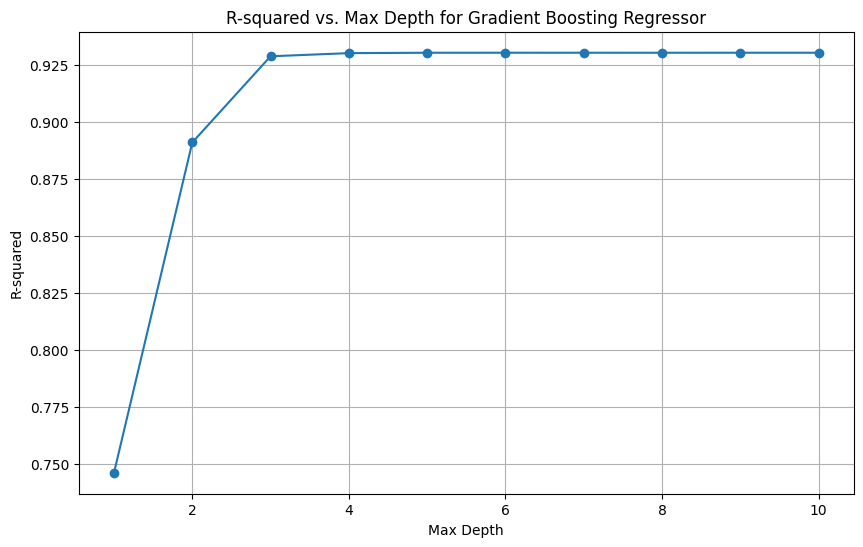

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
import numpy as np  # Import numpy library

# Load your preprocessed SAR image data
data = pd.read_csv('/content/Soilmoisture gt data.csv')

# Select relevant columns excluding Sigma0_VV_db (31.01.2024)
X = data[['Elevation (in m above MSL)', 'Sigma0_VV_db (31.01.2024)', 'LULC']]
y = data['Moisture Reading']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Handle missing values
imputer = SimpleImputer(strategy='mean')
X_train[['Sigma0_VV_db (31.01.2024)']] = imputer.fit_transform(X_train[['Sigma0_VV_db (31.01.2024)']])
X_test[['Sigma0_VV_db (31.01.2024)']] = imputer.transform(X_test[['Sigma0_VV_db (31.01.2024)']])

# Convert categorical columns to one-hot encoding
encoder = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(), ['LULC'])
    ],
    remainder='passthrough'
)
X_train_encoded = encoder.fit_transform(X_train)
X_test_encoded = encoder.transform(X_test)

# Create a Gradient Boosting regression model
gb_model = GradientBoostingRegressor(random_state=42)

# Drop rows with NaN values in y_train
nan_indices = y_train.index[y_train.isna()]
X_train_encoded = X_train_encoded[~y_train.isna()]
y_train = y_train.dropna()

# Train the model
gb_model.fit(X_train_encoded, y_train)

# Drop rows with NaN values in y_test
nan_indices = y_test.index[y_test.isna()]
X_test_encoded = X_test_encoded[~y_test.isna()]
y_test = y_test.dropna()

# Make predictions
y_pred = gb_model.predict(X_test_encoded)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

depths = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
r2_scores = []

for depth in depths:
    gb_model = GradientBoostingRegressor(max_depth=depth, random_state=42)
    gb_model.fit(X_train_encoded, y_train)
    y_pred = gb_model.predict(X_test_encoded)
    r2 = r2_score(y_test, y_pred)
    r2_scores.append(r2)
    print(f"Depth {depth}: R-squared = {r2}")

plt.figure(figsize=(10, 6))
plt.plot(depths, r2_scores, marker='o')
plt.xlabel('Max Depth')
plt.ylabel('R-squared')
plt.title('R-squared vs. Max Depth for Gradient Boosting Regressor')
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Load your preprocessed SAR image data
data = pd.read_csv('/content/Soilmoisture gt data1.csv')

# Select relevant columns excluding Sigma0_VH_db (31.01.2024) and including RVI(31.1.24)
X = data[['Elevation (in m above MSL)', 'RVI(31.1.24)', 'LULC']]
y = data['Moisture Reading']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Encode categorical columns to numeric values
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
X_train_encoded = encoder.fit_transform(X_train[['LULC']])
X_test_encoded = encoder.transform(X_test[['LULC']])

# Get feature names for the encoded columns
encoded_feature_names = [f'LULC_{category}' for category in encoder.categories_[0]]

# Impute missing values in non-categorical columns
imputer = SimpleImputer(strategy='mean')
X_train_numeric = imputer.fit_transform(X_train.drop(columns=['LULC']))
X_test_numeric = imputer.transform(X_test.drop(columns=['LULC']))

# Combine imputed numeric columns and encoded categorical columns
X_train_final = pd.DataFrame(
    data=X_train_numeric,
    columns=X_train.drop(columns=['LULC']).columns
).join(pd.DataFrame(
    data=X_train_encoded,
    columns=encoded_feature_names,
    index=X_train.index
))

X_test_final = pd.DataFrame(
    data=X_test_numeric,
    columns=X_test.drop(columns=['LULC']).columns
).join(pd.DataFrame(
    data=X_test_encoded,
    columns=encoded_feature_names,
    index=X_test.index
))

# Impute missing values in X_train_final and X_test_final
X_train_final_imputed = imputer.fit_transform(X_train_final)
X_test_final_imputed = imputer.transform(X_test_final)

# Drop rows with NaN values in y_train
nan_indices_y_train = y_train.index[y_train.isna()]
X_train_final_imputed = X_train_final_imputed[~y_train.isna()]
y_train = y_train.dropna()

# Create a Gradient Boosting regression model
gb_model = GradientBoostingRegressor(random_state=42)

# Train the model
gb_model.fit(X_train_final_imputed, y_train)

# Make predictions
y_pred = gb_model.predict(X_test_final_imputed)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

from scipy.stats import pearsonr

# Calculate the coefficient of correlation
correlation_coefficient, _ = pearsonr(y_pred, y_test)

print("Coefficient of correlation:", correlation_coefficient)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


ValueError: Input contains NaN.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from scipy.stats import pearsonr
import numpy as np

# Load your preprocessed SAR image data
data = pd.read_csv('/content/Soilmoisture gt data1.csv')

# Select relevant columns excluding Sigma0_VH_db (31.01.2024) and including RVI(31.1.24)
X = data[['Elevation (in m above MSL)', 'MPDI(31.1.24)', 'LULC']]
y = data['Moisture Reading']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Encode categorical columns to numeric values
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
X_train_encoded = encoder.fit_transform(X_train[['LULC']])
X_test_encoded = encoder.transform(X_test[['LULC']])

# Get feature names for the encoded columns
encoded_feature_names = [f'LULC_{category}' for category in encoder.categories_[0]]

# Impute missing values in non-categorical columns
imputer = SimpleImputer(strategy='mean')
X_train_numeric = imputer.fit_transform(X_train.drop(columns=['LULC']))
X_test_numeric = imputer.transform(X_test.drop(columns=['LULC']))

# Combine imputed numeric columns and encoded categorical columns
X_train_final = pd.DataFrame(
    data=X_train_numeric,
    columns=X_train.drop(columns=['LULC']).columns
).join(pd.DataFrame(
    data=X_train_encoded,
    columns=encoded_feature_names,
    index=X_train.index
))

X_test_final = pd.DataFrame(
    data=X_test_numeric,
    columns=X_test.drop(columns=['LULC']).columns
).join(pd.DataFrame(
    data=X_test_encoded,
    columns=encoded_feature_names,
    index=X_test.index
))

# Impute missing values in X_train_final and X_test_final
X_train_final_imputed = imputer.fit_transform(X_train_final)
X_test_final_imputed = imputer.transform(X_test_final)

# Drop rows with NaN values in y_train
nan_indices_y_train = y_train.index[y_train.isna()]
X_train_final_imputed = X_train_final_imputed[~y_train.isna()]
y_train = y_train.dropna()

# Create a Gradient Boosting regression model
gb_model = GradientBoostingRegressor(random_state=42)

# Train the model
gb_model.fit(X_train_final_imputed, y_train)

# Drop rows with NaN values in y_test
nan_indices_y_test = y_test.index[y_test.isna()]
X_test_final_imputed = X_test_final_imputed[~y_test.isna()]
y_test = y_test.dropna()

# Make predictions
y_pred = gb_model.predict(X_test_final_imputed)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Calculate the coefficient of correlation
correlation_coefficient, _ = pearsonr(y_pred, y_test)
print("Coefficient of correlation:", correlation_coefficient)

# Calculate RMSE
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)



Mean Squared Error: 18.848234698518844
R-squared: 0.7888310787256627
Coefficient of correlation: 0.9199635344402561
Root Mean Squared Error: 4.3414553664086935


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


**ANN MODEL**

In [ ]:
#VV
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

# Load your preprocessed SAR image data
data = pd.read_csv('/content/Soilmoisture gt data1.csv')

# Select relevant columns excluding Sigma0_VH_db (31.01.2024)
X = data[['Elevation (in m above MSL)', 'Sigma0_VV_db (31.01.2024)', 'LULC']]
y = data['Moisture Reading']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Handle missing values in the target variable y
y_train = y_train.fillna(y_train.mean())
y_test = y_test.fillna(y_train.mean())

# Preprocess categorical columns using one-hot encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(), ['LULC'])
    ],
    remainder='passthrough'
)
X_train_encoded = preprocessor.fit_transform(X_train)
X_test_encoded = preprocessor.transform(X_test)

# Impute missing values in the input features
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train_encoded)
X_test_imputed = imputer.transform(X_test_encoded)

# Scale the input features
scaler = StandardScaler(with_mean=False)
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# Create an ANN model
model = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', max_iter=2000, learning_rate_init=0.001, random_state=42)


# Train the model
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

from scipy.stats import pearsonr

# Calculate the coefficient of correlation
correlation_coefficient, _ = pearsonr(y_pred, y_test)

print("Coefficient of correlation:", correlation_coefficient)


Mean Squared Error: 12.59999756703288
R-squared: 0.8299666821221041
Coefficient of correlation: 0.9220056106259058


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
#VH
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

# Load your preprocessed SAR image data
data = pd.read_csv('/content/Soilmoisture gt data1.csv')

# Select relevant columns excluding Sigma0_VH_db (31.01.2024)
X = data[['Elevation (in m above MSL)', 'Sigma0_VH_db (31.01.2024)', 'LULC']]
y = data['Moisture Reading']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Handle missing values in the target variable y
y_train = y_train.fillna(y_train.mean())
y_test = y_test.fillna(y_train.mean())

# Preprocess categorical columns using one-hot encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(), ['LULC'])
    ],
    remainder='passthrough'
)
X_train_encoded = preprocessor.fit_transform(X_train)
X_test_encoded = preprocessor.transform(X_test)

# Impute missing values in the input features
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train_encoded)
X_test_imputed = imputer.transform(X_test_encoded)

# Scale the input features
scaler = StandardScaler(with_mean=False)
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# Create an ANN model
model = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', max_iter=3000, learning_rate_init=0.001, random_state=42)


# Train the model
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

from scipy.stats import pearsonr

# Calculate the coefficient of correlation
correlation_coefficient, _ = pearsonr(y_pred, y_test)

print("Coefficient of correlation:", correlation_coefficient)


Mean Squared Error: 9.059772750816043
R-squared: 0.8777409906751465
Coefficient of correlation: 0.946011173651015


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

# Load your preprocessed SAR image data
data = pd.read_csv('/content/Soilmoisture gt data1.csv')

# Select relevant columns excluding Sigma0_VH_db (31.01.2024) and including MPDI(31.1.24)
X = data[['MPDI(31.1.24)', 'LULC']]
y = data['Moisture Reading']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Handle missing values in the target variable y
y_train = y_train.fillna(y_train.mean())
y_test = y_test.fillna(y_train.mean())

# Preprocess categorical columns using one-hot encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(), ['LULC'])
    ],
    remainder='passthrough'
)
X_train_encoded = preprocessor.fit_transform(X_train)
X_test_encoded = preprocessor.transform(X_test)

# Impute missing values in the input features
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train_encoded)
X_test_imputed = imputer.transform(X_test_encoded)

# Scale the input features
scaler = StandardScaler(with_mean=False)
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# Create an ANN model

model = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', max_iter=2000, learning_rate_init=0.001, random_state=42)

# Train the model
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

from scipy.stats import pearsonr

# Calculate the coefficient of correlation
correlation_coefficient, _ = pearsonr(y_pred, y_test)

print("Coefficient of correlation:", correlation_coefficient)

# Calculate RMSE
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)




Mean Squared Error: 18.425858078342557
R-squared: 0.781451232711024
Coefficient of correlation: 0.9035277249250365
Root Mean Squared Error: 4.29253515749639


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

# Load your preprocessed SAR image data
data = pd.read_csv('/content/Soilmoisture gt data1.csv')

# Select relevant columns excluding Sigma0_VH_db (31.01.2024) and including MPDI(31.1.24)
X = data[['Elevation (in m above MSL)', 'RVI(31.1.24)', 'LULC']]
y = data['Moisture Reading']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Handle missing values in the target variable y
y_train = y_train.fillna(y_train.mean())
y_test = y_test.fillna(y_train.mean())

# Preprocess categorical columns using one-hot encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(), ['LULC'])
    ],
    remainder='passthrough'
)
X_train_encoded = preprocessor.fit_transform(X_train)
X_test_encoded = preprocessor.transform(X_test)

# Impute missing values in the input features
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train_encoded)
X_test_imputed = imputer.transform(X_test_encoded)

# Scale the input features
scaler = StandardScaler(with_mean=False)
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# Create an ANN model
model = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', max_iter=3000, learning_rate_init=0.001, random_state=42)

# Train the model
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

from scipy.stats import pearsonr

# Calculate the coefficient of correlation
correlation_coefficient, _ = pearsonr(y_pred, y_test)

print("Coefficient of correlation:", correlation_coefficient)


Mean Squared Error: 11.724820142460171
R-squared: 0.8417769479924151
Coefficient of correlation: 0.9330761947158358


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


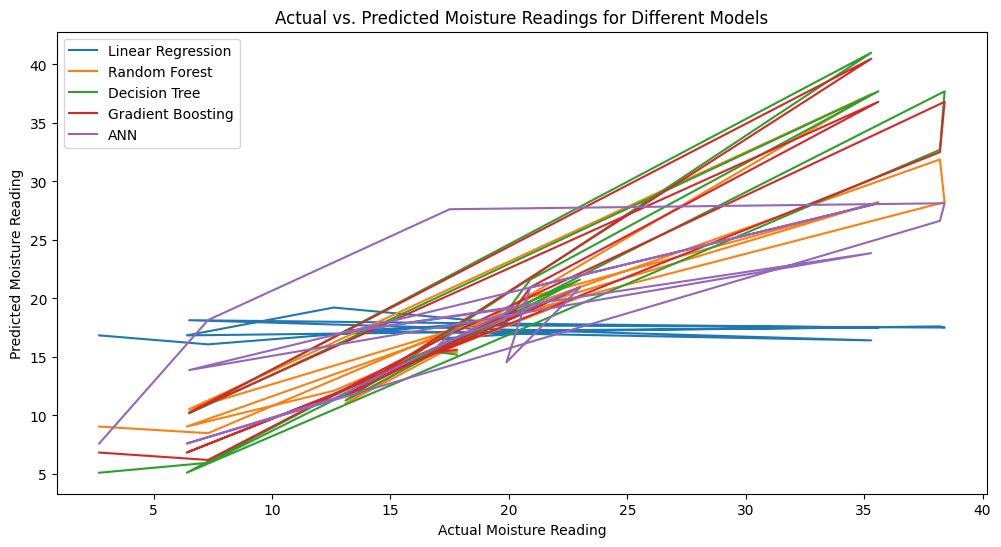

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

# Load your data
data = '/content/Soilmoisture gt data1.csv'
data = pd.read_csv(data)

# Drop rows with NaN in the target column
data.dropna(subset=['Moisture Reading'], inplace=True)

# Select relevant columns
X = data[['Elevation (in m above MSL)', 'MPDI(31.1.24)']]
y = data['Moisture Reading']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define preprocessing steps
numeric_features = ['Elevation (in m above MSL)', 'MPDI(31.1.24)']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)])

# Create models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'ANN': MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', max_iter=1000, random_state=42)
}

# Train models and make predictions
predictions = {}
for name, model in models.items():
    model_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                      ('model', model)])
    model_pipeline.fit(X_train, y_train)
    y_pred = model_pipeline.predict(X_test)
    predictions[name] = (y_test, y_pred)

# Plotting
plt.figure(figsize=(12, 6))
for name, (y_test, y_pred) in predictions.items():
    plt.plot(y_test, y_pred, label=name)

plt.xlabel('Actual Moisture Reading')
plt.ylabel('Predicted Moisture Reading')
plt.legend()
plt.title('Actual vs. Predicted Moisture Readings for Different Models')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(


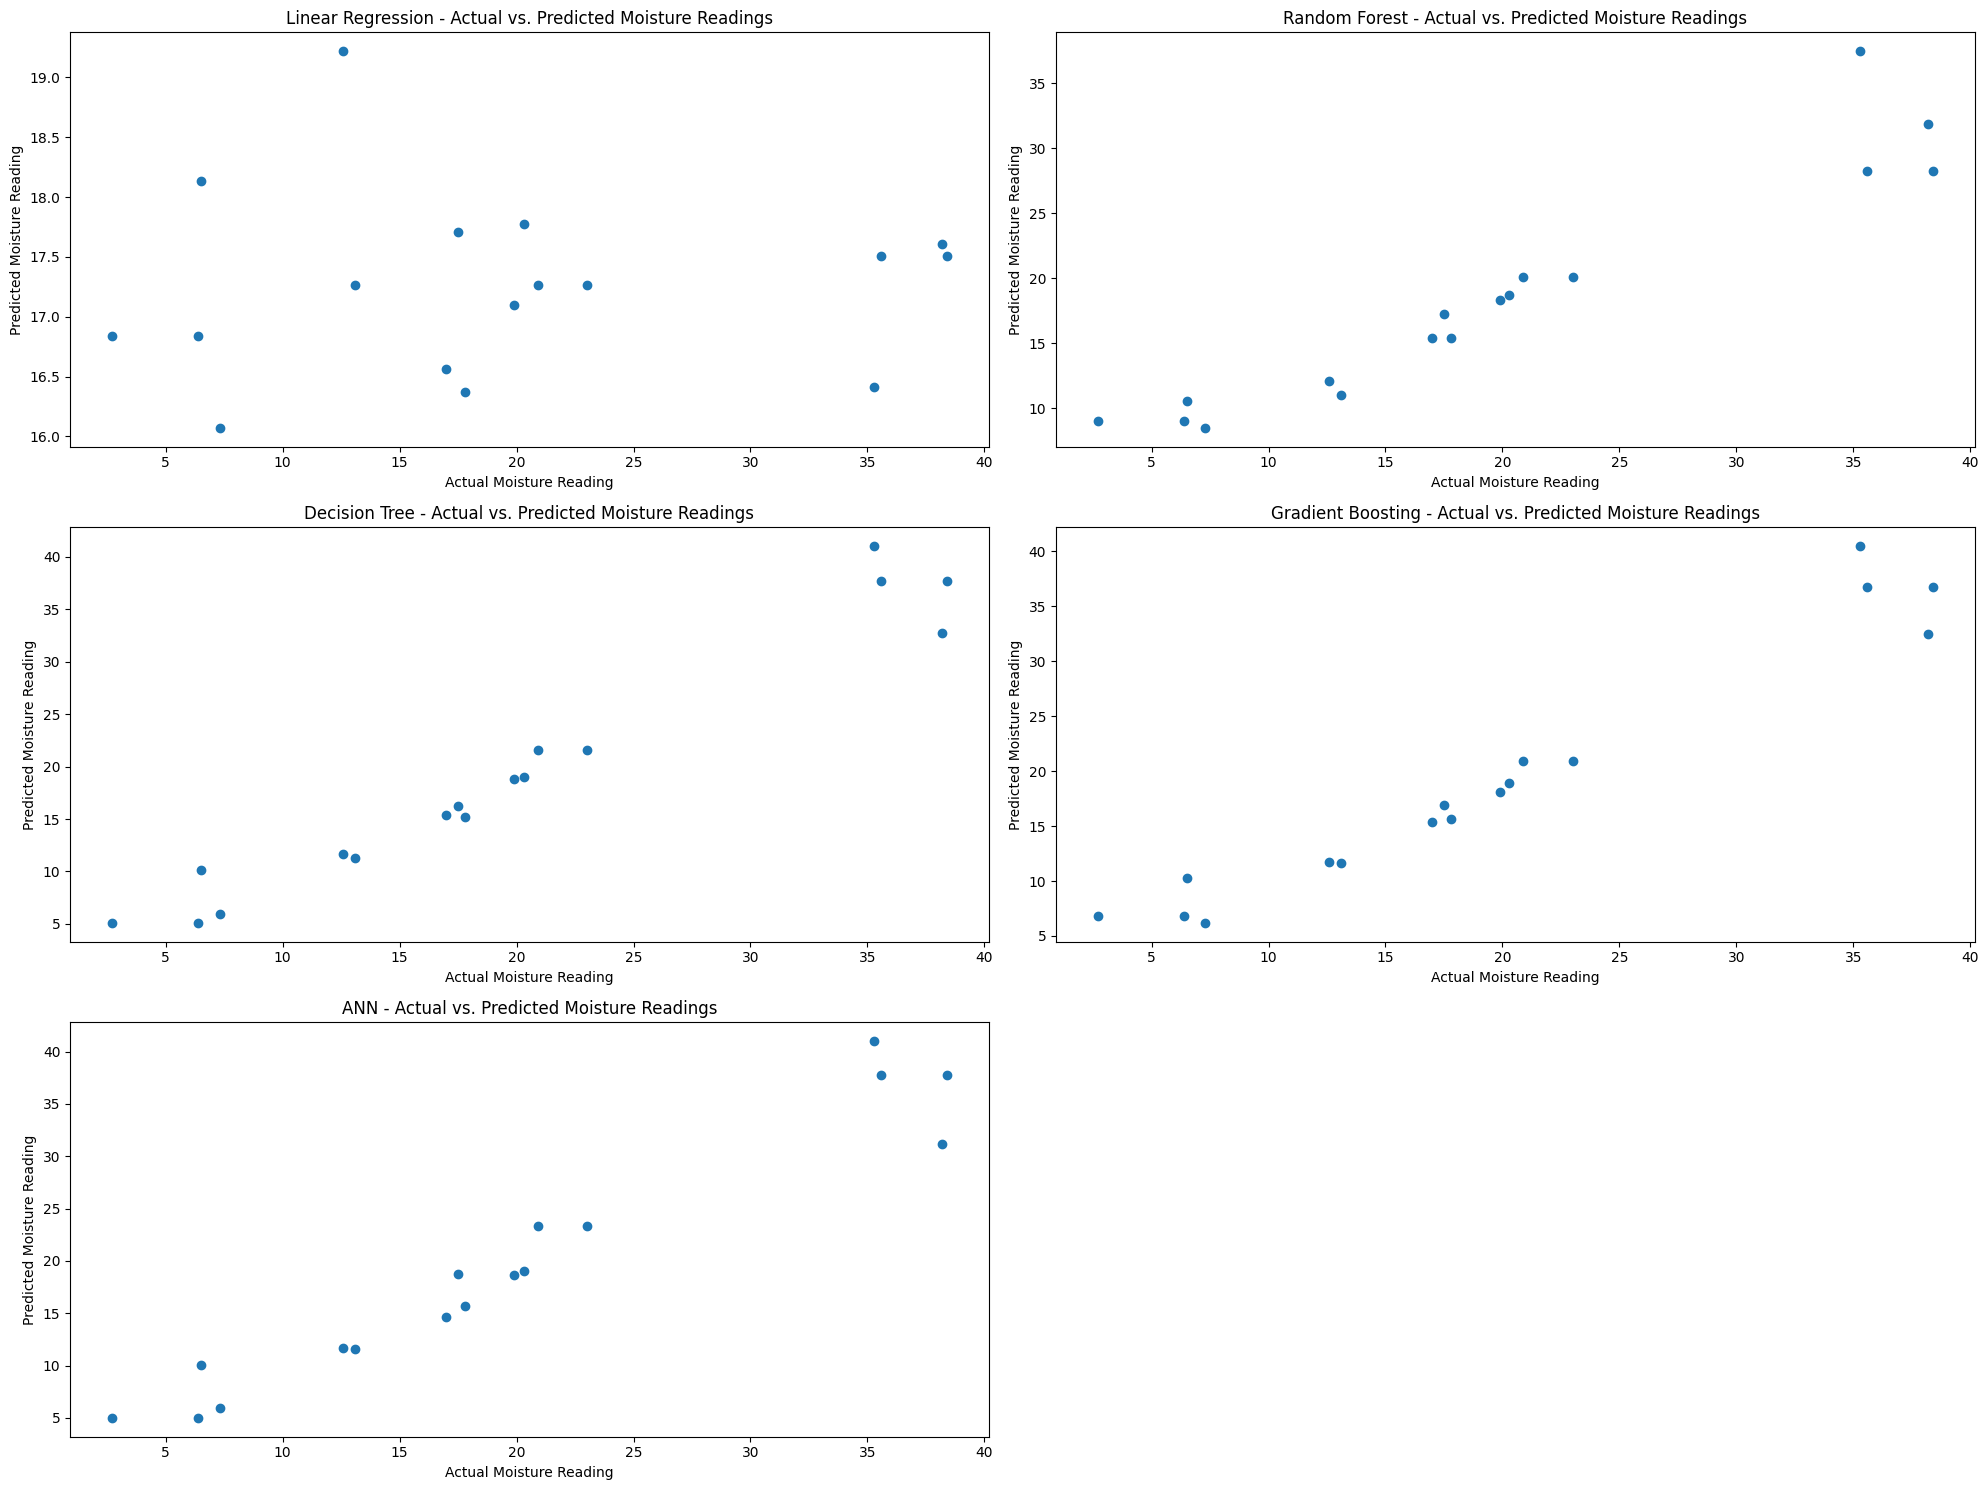

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

# Load your data
data = '/content/Soilmoisture gt data1.csv'
data = pd.read_csv(data)

# Drop rows with NaN in the target column
data.dropna(subset=['Moisture Reading'], inplace=True)

# Select relevant columns
X = data[['Elevation (in m above MSL)', 'MPDI(31.1.24)']]
y = data['Moisture Reading']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define preprocessing steps
numeric_features = ['Elevation (in m above MSL)', 'MPDI(31.1.24)']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)])

# Create models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'ANN': MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', max_iter=3000,learning_rate_init=0.001,random_state=42)

}

# Train models and make predictions
predictions = {}
for name, model in models.items():
    model_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                      ('model', model)])
    model_pipeline.fit(X_train, y_train)
    y_pred = model_pipeline.predict(X_test)
    predictions[name] = (y_test, y_pred)

# Plotting
plt.figure(figsize=(20, 15))
for i, (name, (y_test, y_pred)) in enumerate(predictions.items(), 1):
    plt.subplot(3, 2, i)
    plt.plot(y_test, y_pred, 'o')
    plt.xlabel('Actual Moisture Reading')
    plt.ylabel('Predicted Moisture Reading')
    plt.title(f'{name} - Actual vs. Predicted Moisture Readings')

plt.tight_layout()
plt.show()


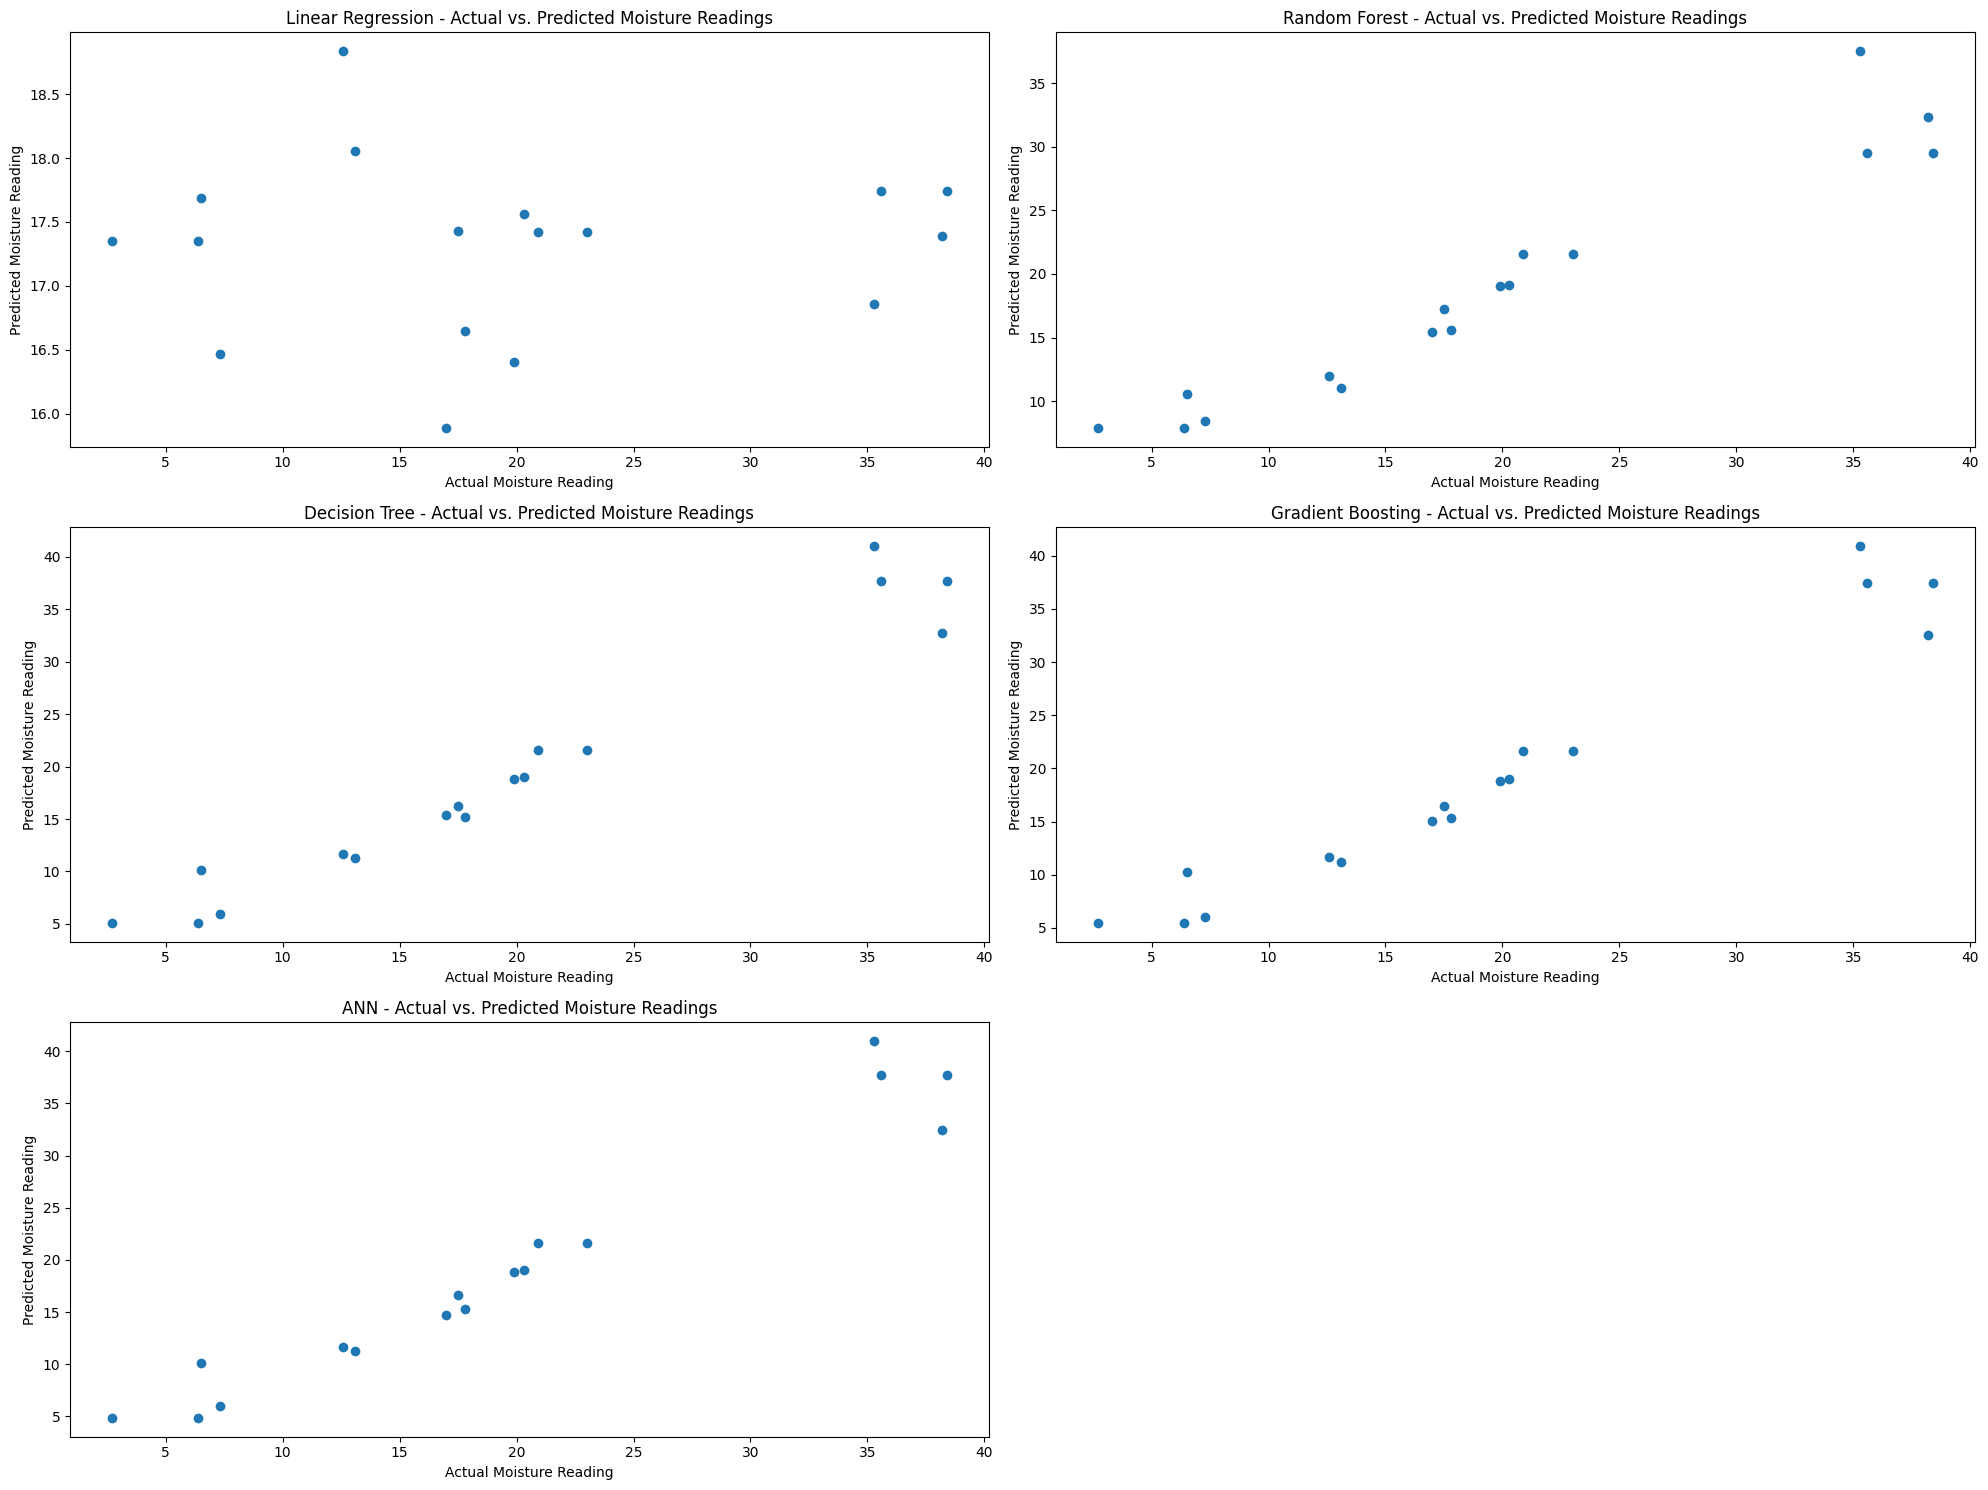

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

# Load your data
data = '/content/Soilmoisture gt data1.csv'
data = pd.read_csv(data)

# Drop rows with NaN in the target column
data.dropna(subset=['Moisture Reading'], inplace=True)

# Select relevant columns
X = data[['Elevation (in m above MSL)', 'Sigma0_VV_db (31.01.2024)','RVI(31.1.24)']]
y = data['Moisture Reading']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define preprocessing steps
numeric_features = ['Elevation (in m above MSL)','Sigma0_VV_db (31.01.2024)','RVI(31.1.24)']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)])

# Create models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'ANN': MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', max_iter=3000,learning_rate_init=0.001,random_state=42)

}

# Train models and make predictions
predictions = {}
for name, model in models.items():
    model_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                      ('model', model)])
    model_pipeline.fit(X_train, y_train)
    y_pred = model_pipeline.predict(X_test)
    predictions[name] = (y_test, y_pred)

# Plotting
plt.figure(figsize=(20, 15))
for i, (name, (y_test, y_pred)) in enumerate(predictions.items(), 1):
    plt.subplot(3, 2, i)
    plt.plot(y_test, y_pred, 'o')
    plt.xlabel('Actual Moisture Reading')
    plt.ylabel('Predicted Moisture Reading')
    plt.title(f'{name} - Actual vs. Predicted Moisture Readings')

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from scipy.stats import pearsonr

# Load your preprocessed SAR image data
data = pd.read_csv('/content/Soilmoisture gt data1.csv')

# Select relevant columns excluding Sigma0_VH_db (31.01.2024)
X = data[['Elevation (in m above MSL)', 'MPDI(31.1.24)', 'LULC']]
y = data['Moisture Reading']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert categorical columns to one-hot encoding
encoder = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(), ['LULC'])
    ],
    remainder='passthrough'
)
X_train_encoded = encoder.fit_transform(X_train)
X_test_encoded = encoder.transform(X_test)

# Create a Decision Tree regression model
dt_model = DecisionTreeRegressor(random_state=42)

# Drop rows with NaN values in y_train
nan_indices = y_train.index[y_train.isna()]
X_train_encoded = X_train_encoded[~y_train.isna()]
y_train = y_train.dropna()

# Train the model
dt_model.fit(X_train_encoded, y_train)

# Drop rows with NaN values in y_test
nan_indices = y_test.index[y_test.isna()]
X_test_encoded = X_test_encoded[~y_test.isna()]
y_test = y_test.dropna()

# Make predictions
y_pred = dt_model.predict(X_test_encoded)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Calculate the coefficient of correlation
correlation_coefficient, _ = pearsonr(y_pred, y_test)

print("Coefficient of correlation:", correlation_coefficient)

# Create a DataFrame with predicted and actual values
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Save the results to a CSV file
results_df.to_csv('predicted_moisture_reading.csv', index=False)



Mean Squared Error: 5.622258986928109
R-squared: 0.9280954051298491
Coefficient of correlation: 0.9708670441511884


In [ ]:
#VV
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Load your preprocessed SAR image data
data = pd.read_csv('/content/Soilmoisture gt data1.csv')

# Select relevant columns excluding Sigma0_VH_db (31.01.2024)
X = data[['Elevation (in m above MSL)', 'Sigma0_VV_db (31.01.2024)', 'LULC']]
y = data['Moisture Reading']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Handle missing values
imputer = SimpleImputer(strategy='mean')
X_train[['Sigma0_VV_db (31.01.2024)']] = imputer.fit_transform(X_train[['Sigma0_VV_db (31.01.2024)']])
X_test[['Sigma0_VV_db (31.01.2024)']] = imputer.transform(X_test[['Sigma0_VV_db (31.01.2024)']])

# Convert categorical columns to one-hot encoding
encoder = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(), ['LULC'])
    ],
    remainder='passthrough'
)
X_train_encoded = encoder.fit_transform(X_train)
X_test_encoded = encoder.transform(X_test)

# Create a Decision Tree regression model
dt_model = DecisionTreeRegressor(random_state=42)

# Drop rows with NaN values in y_train
nan_indices = y_train.index[y_train.isna()]
X_train_encoded = X_train_encoded[~y_train.isna()]
y_train = y_train.dropna()

# Train the model
dt_model.fit(X_train_encoded, y_train)

# Drop rows with NaN values in y_test
nan_indices = y_test.index[y_test.isna()]
X_test_encoded = X_test_encoded[~y_test.isna()]
y_test = y_test.dropna()

# Make predictions
y_pred = dt_model.predict(X_test_encoded)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

from scipy.stats import pearsonr

# Calculate the coefficient of correlation
correlation_coefficient, _ = pearsonr(y_pred, y_test)

print("Coefficient of correlation:", correlation_coefficient)

Mean Squared Error: 5.728153758169937
R-squared: 0.9267410881830996
Coefficient of correlation: 0.9669473609493713


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

# Load your preprocessed SAR image data
data = pd.read_csv('/content/predicted_moisture_readingfinal.csv')

# Select relevant columns excluding Sigma0_VH_db (31.01.2024)
X = data[['Sigma0_VH_db (19.01.2024)', 'Sigma0_VV_db (19.01.2024)','MPDI']]
y = data['Predicted']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Handle missing values
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Create a Decision Tree regression model
dt_model = DecisionTreeRegressor(random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

# Make predictions
y_pred = dt_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

from scipy.stats import pearsonr

# Calculate the coefficient of correlation
correlation_coefficient, _ = pearsonr(y_pred, y_test)

print("Coefficient of correlation:", correlation_coefficient)


Mean Squared Error: 417.9462500000001
R-squared: -2.090604057863845
Coefficient of correlation: -0.5772577848048126
